In [716]:
# importing libraries
import numpy as np
import statistics
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [717]:
atp_data = pd.read_csv("atp_tennis_.csv")
top_players_data = pd.read_csv("men_single_statistics.csv")

In [718]:
atp_data

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.00,-1.00,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.00,-1.00,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.00,-1.00,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.00,-1.00,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.00,-1.00,7-6 5-7 6-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61541,Sofia Open,2023-11-09,ATP250,Indoor,Hard,Quarterfinals,3,Ofner S.,Mannarino A.,Mannarino A.,44,25,1019,1525,2.75,1.44,7-6 4-6 3-6
61542,Sofia Open,2023-11-09,ATP250,Indoor,Hard,Quarterfinals,3,Kotov P.,Fucsovics M.,Kotov P.,80,47,721,957,2.50,1.53,6-3 7-6
61543,Sofia Open,2023-11-10,ATP250,Indoor,Hard,Semifinals,3,Struff J.L.,Draper J.,Draper J.,28,82,1442,706,3.40,1.33,3-6 4-6
61544,Sofia Open,2023-11-10,ATP250,Indoor,Hard,Semifinals,3,Mannarino A.,Kotov P.,Mannarino A.,25,80,1525,721,1.62,2.30,6-2 7-6


In [719]:
top_players_data.columns.values

array(['Ranking', 'Name', 'Points', 'Height', 'Age', 'Weights',
       'Head to Head', 'Ace', 'Serve', 'Double Faluts', '1st serve %',
       '1st serve won', '2nd serve won', 'break points saved',
       'service points won%', 'service games won', 'service games played',
       'return points won', '1st return points won %',
       '2nd return points won %', 'break points converted',
       'return games won', 'return games played'], dtype=object)

In [720]:
# atp_data['Date'] = pd.to_datetime(atp_data['Date'])  # Make sure the column name is 'Date'

# atp_data = atp_data[atp_data['Date'].dt.year == 2023]

# atp_data

In [721]:
atp_data = atp_data[(atp_data['Player_1'] == 'Djokovic N.') | (atp_data['Player_2'] == 'Djokovic N.')]


atp_data

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
13141,Croatia Open,2004-07-20,International,Outdoor,Clay,1st Round,3,Djokovic N.,Volandri F.,Volandri F.,368,65,-1,-1,5.50,1.12,6-7 1-6
13527,Open Romania,2004-09-14,International,Outdoor,Clay,1st Round,3,Clement A.,Djokovic N.,Djokovic N.,67,272,-1,-1,1.53,2.35,6-2 4-6 4-6
13544,Open Romania,2004-09-16,International,Outdoor,Clay,2nd Round,3,Ferrer D.,Djokovic N.,Ferrer D.,54,272,-1,-1,1.28,3.50,4-6 6-4 6-4
13586,Thailand Open,2004-09-28,International,Indoor,Hard,1st Round,3,van Scheppingen D.,Djokovic N.,van Scheppingen D.,81,248,-1,-1,1.61,2.20,4-6 7-5 6-4
14209,Australian Open,2005-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,Safin M.,Safin M.,188,4,-1,-1,7.50,1.07,0-6 2-6 1-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61475,BNP Paribas Masters,2023-11-01,Masters 1000,Indoor,Hard,2nd Round,3,Etcheverry T.,Djokovic N.,Djokovic N.,31,1,1380,11045,11.00,1.05,3-6 2-6
61485,BNP Paribas Masters,2023-11-02,Masters 1000,Indoor,Hard,3rd Round,3,Griekspoor T.,Djokovic N.,Djokovic N.,23,1,1570,11045,7.00,1.10,6-4 6-7 4-6
61489,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,Hard,Quarterfinals,3,Rune H.,Djokovic N.,Djokovic N.,7,1,4280,11045,3.75,1.29,5-7 7-6 4-6
61492,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,Hard,Semifinals,3,Djokovic N.,Rublev A.,Djokovic N.,1,5,11045,4935,1.36,3.20,5-7 7-6 7-5


In [722]:
atp_data = atp_data.copy()

# Create the 'is_winner' column
atp_data['is_winner'] = np.where(atp_data['Winner'] == 'Djokovic N.', 1, 0)

# Display the DataFrame
atp_data

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,is_winner
13141,Croatia Open,2004-07-20,International,Outdoor,Clay,1st Round,3,Djokovic N.,Volandri F.,Volandri F.,368,65,-1,-1,5.50,1.12,6-7 1-6,0
13527,Open Romania,2004-09-14,International,Outdoor,Clay,1st Round,3,Clement A.,Djokovic N.,Djokovic N.,67,272,-1,-1,1.53,2.35,6-2 4-6 4-6,1
13544,Open Romania,2004-09-16,International,Outdoor,Clay,2nd Round,3,Ferrer D.,Djokovic N.,Ferrer D.,54,272,-1,-1,1.28,3.50,4-6 6-4 6-4,0
13586,Thailand Open,2004-09-28,International,Indoor,Hard,1st Round,3,van Scheppingen D.,Djokovic N.,van Scheppingen D.,81,248,-1,-1,1.61,2.20,4-6 7-5 6-4,0
14209,Australian Open,2005-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,Safin M.,Safin M.,188,4,-1,-1,7.50,1.07,0-6 2-6 1-6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61475,BNP Paribas Masters,2023-11-01,Masters 1000,Indoor,Hard,2nd Round,3,Etcheverry T.,Djokovic N.,Djokovic N.,31,1,1380,11045,11.00,1.05,3-6 2-6,1
61485,BNP Paribas Masters,2023-11-02,Masters 1000,Indoor,Hard,3rd Round,3,Griekspoor T.,Djokovic N.,Djokovic N.,23,1,1570,11045,7.00,1.10,6-4 6-7 4-6,1
61489,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,Hard,Quarterfinals,3,Rune H.,Djokovic N.,Djokovic N.,7,1,4280,11045,3.75,1.29,5-7 7-6 4-6,1
61492,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,Hard,Semifinals,3,Djokovic N.,Rublev A.,Djokovic N.,1,5,11045,4935,1.36,3.20,5-7 7-6 7-5,1


In [723]:

# Load the ATP tennis data into a DataFrame

# Create a feature for outdoor points (2 points for outdoor, 1 point for indoor)
atp_data['Outdoor_Points'] = atp_data['Court'].str.contains('Indoor').apply(lambda x: 2 if not x else 1)

# Assign points to different surface types
surface_points = {
    'Hard': 3,
    'Clay': 2,
    'Grass': 1,
}

# Map the surface types to points using .loc
atp_data.loc[:, 'Surface_Points'] = atp_data['Surface'].map(surface_points)

# Fill missing values in Surface_Points with 0
atp_data['Surface_Points'].fillna(0, inplace=True)

# Print the updated DataFrame
atp_data

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,is_winner,Outdoor_Points,Surface_Points
13141,Croatia Open,2004-07-20,International,Outdoor,Clay,1st Round,3,Djokovic N.,Volandri F.,Volandri F.,368,65,-1,-1,5.50,1.12,6-7 1-6,0,2,2.0
13527,Open Romania,2004-09-14,International,Outdoor,Clay,1st Round,3,Clement A.,Djokovic N.,Djokovic N.,67,272,-1,-1,1.53,2.35,6-2 4-6 4-6,1,2,2.0
13544,Open Romania,2004-09-16,International,Outdoor,Clay,2nd Round,3,Ferrer D.,Djokovic N.,Ferrer D.,54,272,-1,-1,1.28,3.50,4-6 6-4 6-4,0,2,2.0
13586,Thailand Open,2004-09-28,International,Indoor,Hard,1st Round,3,van Scheppingen D.,Djokovic N.,van Scheppingen D.,81,248,-1,-1,1.61,2.20,4-6 7-5 6-4,0,1,3.0
14209,Australian Open,2005-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,Safin M.,Safin M.,188,4,-1,-1,7.50,1.07,0-6 2-6 1-6,0,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61475,BNP Paribas Masters,2023-11-01,Masters 1000,Indoor,Hard,2nd Round,3,Etcheverry T.,Djokovic N.,Djokovic N.,31,1,1380,11045,11.00,1.05,3-6 2-6,1,1,3.0
61485,BNP Paribas Masters,2023-11-02,Masters 1000,Indoor,Hard,3rd Round,3,Griekspoor T.,Djokovic N.,Djokovic N.,23,1,1570,11045,7.00,1.10,6-4 6-7 4-6,1,1,3.0
61489,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,Hard,Quarterfinals,3,Rune H.,Djokovic N.,Djokovic N.,7,1,4280,11045,3.75,1.29,5-7 7-6 4-6,1,1,3.0
61492,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,Hard,Semifinals,3,Djokovic N.,Rublev A.,Djokovic N.,1,5,11045,4935,1.36,3.20,5-7 7-6 7-5,1,1,3.0


In [724]:
import pandas as pd


# Check if 'Djokovic N' is in the 'player_1' column and set 'player_odd' based on 'odd_1'
atp_data.loc[atp_data['Player_1'] == 'Djokovic N.', 'winner_odd'] = atp_data['Odd_1']

# Check if 'Djokovic N' is in the 'player_2' column and set 'player_odd' based on 'odd_2'
atp_data.loc[atp_data['Player_2'] == 'Djokovic N.', 'winner_odd'] = atp_data['Odd_2']

atp_data

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,...,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,is_winner,Outdoor_Points,Surface_Points,winner_odd
13141,Croatia Open,2004-07-20,International,Outdoor,Clay,1st Round,3,Djokovic N.,Volandri F.,Volandri F.,...,65,-1,-1,5.50,1.12,6-7 1-6,0,2,2.0,5.50
13527,Open Romania,2004-09-14,International,Outdoor,Clay,1st Round,3,Clement A.,Djokovic N.,Djokovic N.,...,272,-1,-1,1.53,2.35,6-2 4-6 4-6,1,2,2.0,2.35
13544,Open Romania,2004-09-16,International,Outdoor,Clay,2nd Round,3,Ferrer D.,Djokovic N.,Ferrer D.,...,272,-1,-1,1.28,3.50,4-6 6-4 6-4,0,2,2.0,3.50
13586,Thailand Open,2004-09-28,International,Indoor,Hard,1st Round,3,van Scheppingen D.,Djokovic N.,van Scheppingen D.,...,248,-1,-1,1.61,2.20,4-6 7-5 6-4,0,1,3.0,2.20
14209,Australian Open,2005-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,Safin M.,Safin M.,...,4,-1,-1,7.50,1.07,0-6 2-6 1-6,0,2,3.0,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61475,BNP Paribas Masters,2023-11-01,Masters 1000,Indoor,Hard,2nd Round,3,Etcheverry T.,Djokovic N.,Djokovic N.,...,1,1380,11045,11.00,1.05,3-6 2-6,1,1,3.0,1.05
61485,BNP Paribas Masters,2023-11-02,Masters 1000,Indoor,Hard,3rd Round,3,Griekspoor T.,Djokovic N.,Djokovic N.,...,1,1570,11045,7.00,1.10,6-4 6-7 4-6,1,1,3.0,1.10
61489,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,Hard,Quarterfinals,3,Rune H.,Djokovic N.,Djokovic N.,...,1,4280,11045,3.75,1.29,5-7 7-6 4-6,1,1,3.0,1.29
61492,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,Hard,Semifinals,3,Djokovic N.,Rublev A.,Djokovic N.,...,5,11045,4935,1.36,3.20,5-7 7-6 7-5,1,1,3.0,1.36


In [725]:
# calculating score_coefficient based on set and 
def calculate_score_coefficient(row):
    scores = row['Score'].split()
    djokovic_is_player1 = row['Player_1'] == 'Djokovic N.'

    total_difference = 0
    for score in scores:
        set_score = score.split('-')
        if len(set_score) != 2:  # skip invalid scores
            continue

        player1_score, player2_score = map(int, set_score)
        difference = player1_score - player2_score
        if not djokovic_is_player1:
            difference = -difference
        total_difference += difference

    return total_difference / len(scores) if scores else 0


atp_data['score_coefficient'] = atp_data.apply(calculate_score_coefficient, axis=1)

atp_data


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,...,Pts_1,Pts_2,Odd_1,Odd_2,Score,is_winner,Outdoor_Points,Surface_Points,winner_odd,score_coefficient
13141,Croatia Open,2004-07-20,International,Outdoor,Clay,1st Round,3,Djokovic N.,Volandri F.,Volandri F.,...,-1,-1,5.50,1.12,6-7 1-6,0,2,2.0,5.50,-3.000000
13527,Open Romania,2004-09-14,International,Outdoor,Clay,1st Round,3,Clement A.,Djokovic N.,Djokovic N.,...,-1,-1,1.53,2.35,6-2 4-6 4-6,1,2,2.0,2.35,0.000000
13544,Open Romania,2004-09-16,International,Outdoor,Clay,2nd Round,3,Ferrer D.,Djokovic N.,Ferrer D.,...,-1,-1,1.28,3.50,4-6 6-4 6-4,0,2,2.0,3.50,-0.666667
13586,Thailand Open,2004-09-28,International,Indoor,Hard,1st Round,3,van Scheppingen D.,Djokovic N.,van Scheppingen D.,...,-1,-1,1.61,2.20,4-6 7-5 6-4,0,1,3.0,2.20,-0.666667
14209,Australian Open,2005-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,Safin M.,Safin M.,...,-1,-1,7.50,1.07,0-6 2-6 1-6,0,2,3.0,7.50,-5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61475,BNP Paribas Masters,2023-11-01,Masters 1000,Indoor,Hard,2nd Round,3,Etcheverry T.,Djokovic N.,Djokovic N.,...,1380,11045,11.00,1.05,3-6 2-6,1,1,3.0,1.05,3.500000
61485,BNP Paribas Masters,2023-11-02,Masters 1000,Indoor,Hard,3rd Round,3,Griekspoor T.,Djokovic N.,Djokovic N.,...,1570,11045,7.00,1.10,6-4 6-7 4-6,1,1,3.0,1.10,0.333333
61489,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,Hard,Quarterfinals,3,Rune H.,Djokovic N.,Djokovic N.,...,4280,11045,3.75,1.29,5-7 7-6 4-6,1,1,3.0,1.29,1.000000
61492,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,Hard,Semifinals,3,Djokovic N.,Rublev A.,Djokovic N.,...,11045,4935,1.36,3.20,5-7 7-6 7-5,1,1,3.0,1.36,0.333333


In [726]:
# age of djokovic at the moment of match


from datetime import datetime

date_of_birth = '1987-05-22'  

dob_datetime = pd.to_datetime(date_of_birth)

atp_data['Date'] = pd.to_datetime(atp_data['Date'])

atp_data['age'] = atp_data['Date'].apply(lambda x: (x - dob_datetime).days / 365.25)



atp_data

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,...,Pts_2,Odd_1,Odd_2,Score,is_winner,Outdoor_Points,Surface_Points,winner_odd,score_coefficient,age
13141,Croatia Open,2004-07-20,International,Outdoor,Clay,1st Round,3,Djokovic N.,Volandri F.,Volandri F.,...,-1,5.50,1.12,6-7 1-6,0,2,2.0,5.50,-3.000000,17.163587
13527,Open Romania,2004-09-14,International,Outdoor,Clay,1st Round,3,Clement A.,Djokovic N.,Djokovic N.,...,-1,1.53,2.35,6-2 4-6 4-6,1,2,2.0,2.35,0.000000,17.316906
13544,Open Romania,2004-09-16,International,Outdoor,Clay,2nd Round,3,Ferrer D.,Djokovic N.,Ferrer D.,...,-1,1.28,3.50,4-6 6-4 6-4,0,2,2.0,3.50,-0.666667,17.322382
13586,Thailand Open,2004-09-28,International,Indoor,Hard,1st Round,3,van Scheppingen D.,Djokovic N.,van Scheppingen D.,...,-1,1.61,2.20,4-6 7-5 6-4,0,1,3.0,2.20,-0.666667,17.355236
14209,Australian Open,2005-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,Safin M.,Safin M.,...,-1,7.50,1.07,0-6 2-6 1-6,0,2,3.0,7.50,-5.000000,17.659138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61475,BNP Paribas Masters,2023-11-01,Masters 1000,Indoor,Hard,2nd Round,3,Etcheverry T.,Djokovic N.,Djokovic N.,...,11045,11.00,1.05,3-6 2-6,1,1,3.0,1.05,3.500000,36.446270
61485,BNP Paribas Masters,2023-11-02,Masters 1000,Indoor,Hard,3rd Round,3,Griekspoor T.,Djokovic N.,Djokovic N.,...,11045,7.00,1.10,6-4 6-7 4-6,1,1,3.0,1.10,0.333333,36.449008
61489,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,Hard,Quarterfinals,3,Rune H.,Djokovic N.,Djokovic N.,...,11045,3.75,1.29,5-7 7-6 4-6,1,1,3.0,1.29,1.000000,36.451745
61492,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,Hard,Semifinals,3,Djokovic N.,Rublev A.,Djokovic N.,...,4935,1.36,3.20,5-7 7-6 7-5,1,1,3.0,1.36,0.333333,36.454483


In [727]:
# feature_cols = ['Outdoor_Points', 'Surface_Points', 'player_odd', 'score_coefficient', 'age']
feature_cols = atp_data.columns[-5:]
print(feature_cols)
X = atp_data[feature_names]
y = atp_data['is_winner']



Index(['Outdoor_Points', 'Surface_Points', 'winner_odd', 'score_coefficient',
       'age'],
      dtype='object')


In [728]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [729]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

feature_names = atp_data.columns[-5:]

X = atp_data[feature_names]
y = atp_data['is_winner']

models = {}
for feature in feature_names:
    model = LogisticRegression()
    model.fit(X, y)
    models[feature] = model


In [730]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [731]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred_proba)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r_squared}')

Mean Squared Error (MSE): 0.02553191489361702
Mean Absolute Error (MAE): 0.02553191489361702
R² Score: 0.8696823737925302


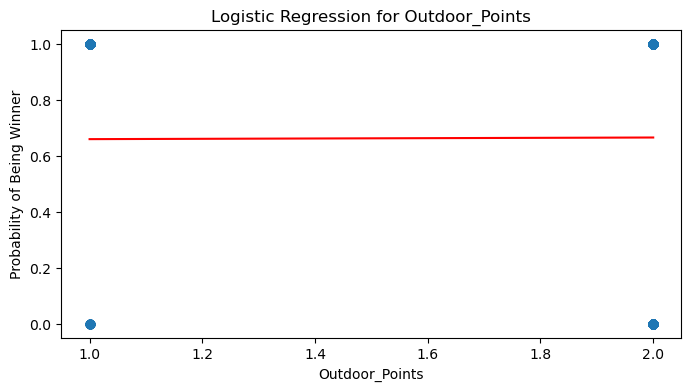

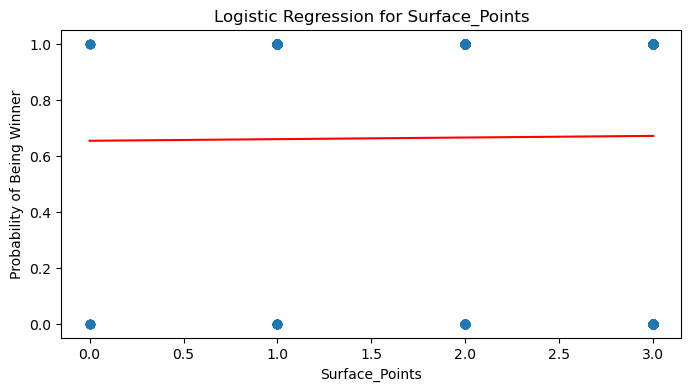

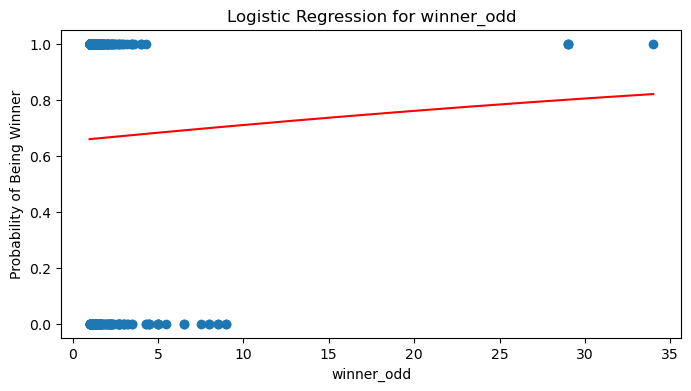

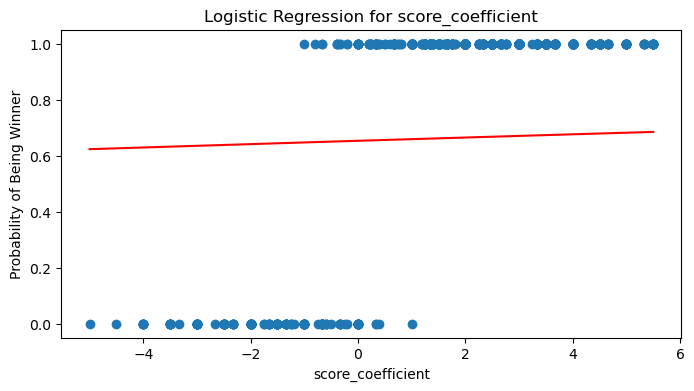

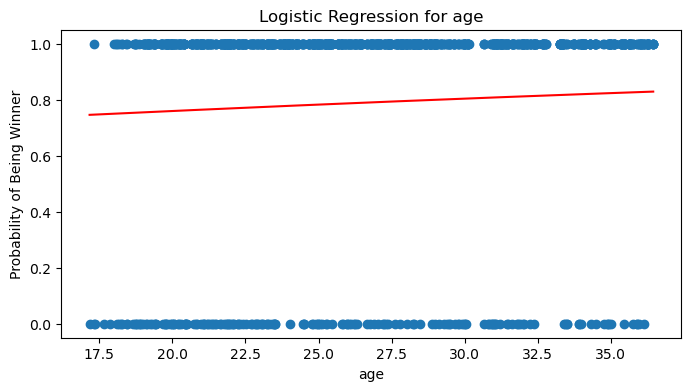

In [732]:
# Define a function to calculate the sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plotting
for feature in feature_names:
    # Generate a range of values
    x_range = np.linspace(atp_data[feature].min(), atp_data[feature].max(), 300)
    
    # Calculate the probability for each value
    y_prob = sigmoid(models[feature].coef_[0][0] * x_range + models[feature].intercept_[0])
    
    # Plot
    plt.figure(figsize=(8, 4))
    plt.scatter(atp_data[feature], atp_data['is_winner'])
    plt.plot(x_range, y_prob, color='red')
    plt.title(f'Logistic Regression for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Probability of Being Winner')
    plt.show()

